<a href="https://colab.research.google.com/github/JARVIS7786/DL-Projects/blob/main/Disease_pred(Heart_Diabetes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class DiseaseRiskPredictor:
    def __init__(self):
        from sklearn.preprocessing import StandardScaler
        self.model = None
        self.scaler = StandardScaler()
        self.feature_names = None # Add attribute to store feature names

In [ ]:
def load_data(self, file_path):
        """Load dataset from CSV file"""
        try:
            self.data = pd.read_csv(file_path)
            return self.data
        except Exception as e:
            print(f"Error loading data: {e}")
            return None

In [ ]:
def preprocess_data(self, target_column):
        """Preprocess the data for training"""
        # Handle missing values
        self.data = self.data.fillna(self.data.mean())

        # Separate features and target
        X = self.data.drop(target_column, axis=1)
        y = self.data[target_column]
        self.feature_names = X.columns.tolist() # Store feature names

        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Scale the features
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

        return self.X_train_scaled, self.X_test_scaled, self.y_train, self.y_test


In [ ]:
def train_model(self, model_type='random_forest'):
        """Train the prediction model"""
        if model_type == 'random_forest':
            from sklearn.ensemble import RandomForestClassifier
            self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        elif model_type == 'logistic_regression':
            self.model = LogisticRegression(random_state=42)

        self.model.fit(self.X_train_scaled, self.y_train)


In [8]:
print(type(predictor.model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
 def evaluate_model(self):
        """Evaluate model performance"""
        # Make predictions
        y_pred = self.model.predict(self.X_test_scaled)

        # Calculate metrics
        accuracy = accuracy_score(self.y_test, y_pred)
        conf_matrix = confusion_matrix(self.y_test, y_pred)

        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(self.y_test, y_pred))

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

        return accuracy, conf_matrix

In [ ]:
 def predict_risk(self, patient_data):
        """Predict disease risk for new patient data"""
        if self.model is None:
            print("Model not trained yet!")
            return None

        # Scale the input data
        patient_data_scaled = self.scaler.transform([patient_data])

        # Make prediction
        risk_prediction = self.model.predict(patient_data_scaled)[0]
        risk_probability = self.model.predict_proba(patient_data_scaled)[0]

        return {
            'risk_prediction': 'High Risk' if risk_prediction == 1 else 'Low Risk',
            'probability': max(risk_probability)
        }

Accuracy: 0.9916

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      7000
         1.0       0.99      0.99      0.99      7000

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



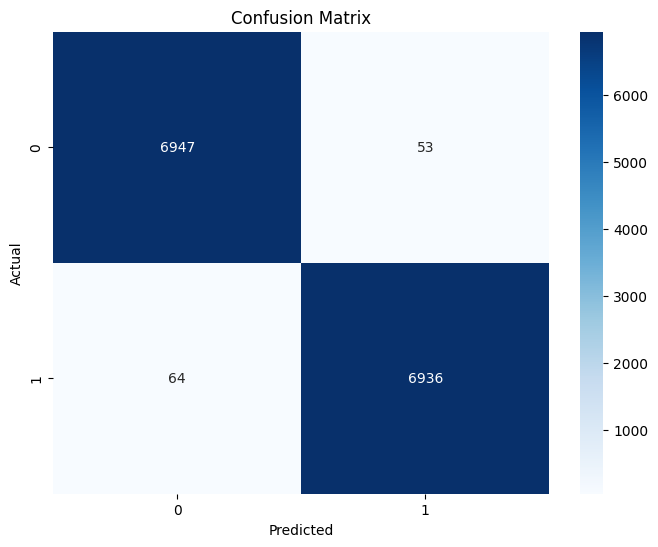

Features used for training: ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender', 'Age']

Prediction for new patient: {'risk_prediction': 'High Risk', 'probability': np.float64(0.94)}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
# Removed class definition and replaced with direct function

# Usage Example
if __name__ == "__main__":
    # Initialize predictor
    predictor = DiseaseRiskPredictor()

    # Load and preprocess data
    data = predictor.load_data('/content/heart_disease_risk_dataset_earlymed.csv')
    if data is not None:
        # Assuming the target column is named 'Heart_Risk'
        X_train, X_test, y_train, y_test = predictor.preprocess_data('Heart_Risk')

        # Train model
        predictor.train_model('random_forest')

        # Evaluate model
        accuracy, conf_matrix = predictor.evaluate_model()

        # Make prediction for new patient
        # Replace with actual patient data based on your dataset's features
        # Need 18 features based on the data after dropping 'Heart_Risk'
        print("Features used for training:", predictor.feature_names) # Print feature names to help construct new_patient
        new_patient = [
            50, # Example value for the first feature
            1,  # Example value for the second feature
            0,  # Example value for the third feature
            140,# Example value for the fourth feature
            230,# Example value for the fifth feature
            0,  # Example value for the sixth feature
            1,  # Example value for the seventh feature
            150,# Example value for the eighth feature
            0,  # Example value for the ninth feature
            2.3,# Example value for the tenth feature
            0,  # Example value for the eleventh feature
            0,  # Example value for the twelfth feature
            1,  # Example value for the thirteenth feature
            0,  # Example value for the fourteenth feature
            0,  # Example value for the fifteenth feature
            0,  # Example value for the sixteenth feature
            0,  # Example value for the seventeenth feature
            48  # Example value for the eighteenth feature
        ] # Example data - REPLACE WITH ACTUAL VALUES
        result = predictor.predict_risk(new_patient)
        print(f"\nPrediction for new patient: {result}")
    else:
        print("Failed to load data. Please check the file path.")

In [ ]:
def load_data(file_path):
  """Loads data from a CSV file."""
  try:
    data = pd.read_csv(file_path)
    return data
  except Exception as e:
    print("Error loading data:",str(e))
    return None

In [ ]:
def preprocess_data(data, target_column):
  """Preprocesses the data by handling missing values, splitting features and target,
  and scaling the features."""
  data = data.fillna(data.mean())

  X = data.drop(target_column, axis=1)
  y = data[target_column]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  return X_train_scaled, X_test_scaled, y_train, y_test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def train_model(self, model_type='random_forest'):
    if model_type == 'random_forest':
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_type == 'logistic_regression':
        self.model = LogisticRegression(random_state=42)

    self.model.fit(self.X_train_scaled, self.y_train)

In [ ]:
def evaluate_model(model, X_test, y_test):
  """Evaluates the trained model and prints performance metrics."""
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}")

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

  print("\nConfusion Matrix:")
  print(confusion_matrix(y_test, y_pred))